# **Task 7: Support Vector Machines (SVM)**
> Dataset used : Breast Cancer Wisconsin (Diagnostic) Data Set

>https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

---



In [60]:
#Importing all the Required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score

## **Loading and Exploring the Dataset**

---



In [61]:
from google.colab import files
uploaded = files.upload()

Saving Breast Cancer Wisconsin (Diagnostic) Data Set.csv to Breast Cancer Wisconsin (Diagnostic) Data Set.csv


In [62]:
df = pd.read_csv('Breast_Cancer.csv')
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [64]:
print("Checking null values in the dataset :")
display(df.isnull().sum())
print("\nNo Null values found in the dataset.")

Checking null values in the dataset :


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0



No Null values found in the dataset.


## **Data Preprocessing & Prepration**

In [65]:
# Droppping the unneccessary features
df = df.drop(['Unnamed: 32', 'id'], axis=1)
display(df.head())

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [66]:
print("Shape and total columns  after dropping unnecessary featues: \n")
print(df.shape)
print(df.columns)

Shape and total columns  after dropping unnecessary featues: 

(569, 31)
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [67]:
# Converting diagnosis to numerical (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

## **Features & Target Split**

In [68]:
# Define features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

## **Features Normalization**

---



In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Train Test Split**

---



In [70]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **SVM with Linear Kernel**

---



In [71]:
svm_linear = SVC(kernel="linear", C=1, probability=True)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
y_prob_linear = svm_linear.predict_proba(X_test)[:,1]

In [72]:
print("\nSVM (Linear Kernel) Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nClassification Report (Linear):\n", classification_report(y_test, y_pred_linear))
print("ROC-AUC pred_linear:", round(roc_auc_score(y_test, y_pred_linear), 3))
print("ROC-AUC prob_linear:", round(roc_auc_score(y_test, y_prob_linear), 3))


SVM (Linear Kernel) Accuracy: 0.956140350877193

Classification Report (Linear):
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC-AUC pred_linear: 0.956
ROC-AUC prob_linear: 0.996


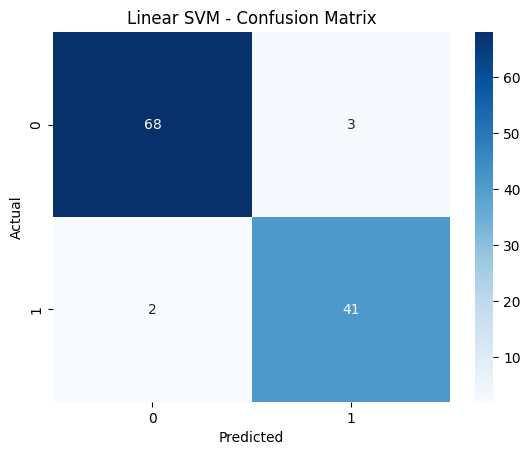

In [73]:
cm_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure()
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues")
plt.title("Linear SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **SVM with RBF Kernel**

---



In [74]:
svm_rbf = SVC(kernel="rbf", probability=True,gamma="scale", random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
y_prob_rbf = svm_rbf.predict_proba(X_test)[:,1]

In [75]:
print("\nSVM (RBF Kernel) Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report (RBF):", classification_report(y_test, y_pred_rbf))
print("ROC-AUC pred_rbf:", round(roc_auc_score(y_test, y_pred_rbf), 3))
print("ROC-AUC prob_rbf:", round(roc_auc_score(y_test, y_prob_rbf), 3))


SVM (RBF Kernel) Accuracy: 0.9736842105263158

Classification Report (RBF):               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC pred_rbf: 0.97
ROC-AUC prob_rbf: 0.997



Confusion Matrix (RBF):


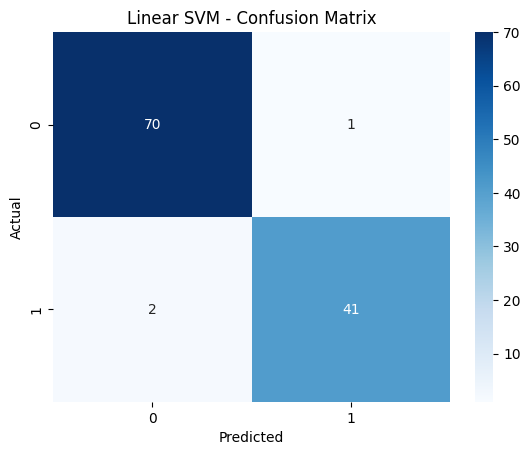

In [76]:
print("\nConfusion Matrix (RBF):")
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure()
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues")
plt.title("Linear SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Visualizing Decision Boundary (2D Example)**

---



In [77]:
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42
)

In [78]:
svm_vis = SVC(kernel="rbf", C=1, gamma="scale")
svm_vis.fit(X_train_vis, y_train_vis)

SVC(C=1)

In [79]:
# Create meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [80]:
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

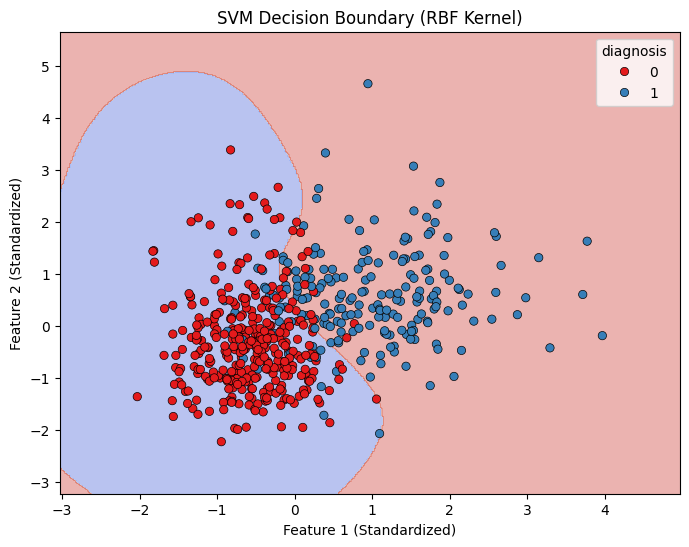

In [81]:
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y, palette="Set1", edgecolor="k")
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.show()

# **Hyperparameter Tuning**

---



In [82]:
C_values = [0.1, 1, 10]
gamma_values = ["scale", 0.1, 1]
results = []

In [83]:
for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel="rbf", C=C, gamma=gamma)
        scores = cross_val_score(model, X_scaled, y, cv=5)
        results.append((C, gamma, scores.mean()))
        print(f"C={C}, gamma={gamma} -> CV Accuracy: {scores.mean():.5f}")

C=0.1, gamma=scale -> CV Accuracy: 0.94554
C=0.1, gamma=0.1 -> CV Accuracy: 0.93499
C=0.1, gamma=1 -> CV Accuracy: 0.62742
C=1, gamma=scale -> CV Accuracy: 0.97364
C=1, gamma=0.1 -> CV Accuracy: 0.95959
C=1, gamma=1 -> CV Accuracy: 0.63093
C=10, gamma=scale -> CV Accuracy: 0.97718
C=10, gamma=0.1 -> CV Accuracy: 0.94726
C=10, gamma=1 -> CV Accuracy: 0.63619


In [84]:
# Converting results to DataFrame
results_df = pd.DataFrame(results, columns=["C", "Gamma", "CV_Accuracy"])
print("\nHyperparameter Tuning Results:\n", results_df)


Hyperparameter Tuning Results:
       C  Gamma  CV_Accuracy
0   0.1  scale     0.945536
1   0.1    0.1     0.934995
2   0.1      1     0.627418
3   1.0  scale     0.973638
4   1.0    0.1     0.959587
5   1.0      1     0.630927
6  10.0  scale     0.977177
7  10.0    0.1     0.947260
8  10.0      1     0.636190


# **Cross Validation**

---



In [85]:
cv_scores = cross_val_score(svm_linear, X, y, cv=5)
print("\nSVM Linear Cross_validation Accuracy: {:.2f}%".format(cv_scores.mean() * 100))


SVM Linear Cross_validation Accuracy: 94.55%


In [86]:
cv_scores = cross_val_score(svm_rbf, X, y, cv=5)
print("\nSVM rbf Cross_validation Accuracy: {:.2f}%".format(cv_scores.mean() * 100))


SVM rbf Cross_validation Accuracy: 91.22%
